In [11]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

from common import hallmark as hm

In [12]:
pf1 = hm.ParaFrame('cache/SPO/summ/SgrA_a{aspin:g}_i{inc:g}_f230.e9.tsv')
pf2 = hm.ParaFrame('cache/beta/summ/SgrA_a{aspin:g}_i{inc:g}_f230.e9_Rh40.tsv')

for k in set(pf1.keys()) - {'path'}:
    globals()[k] = np.unique(pf1[k])
    print(k, globals()[k][:16])

mode = {'SPO':"SPO", 'RhRl':r"$R_{low}-R_{high}$"}

aspin [-0.94 -0.5   0.    0.5   0.94]
inc [30.]


In [13]:
df = pd.read_csv(pf1.path.iloc[0], sep='\t')
print(df.columns)

Index(['time', 'time_hr', 'Mdot', 'Ladv', 'nuLnu', 'Ftot', 'Imin', 'Imax',
       'Imean', 'alpha0', 'beta0', 'major_FWHM', 'minor_FWHM', 'PA', 'mnet',
       'vnet', 'mavg', 'vavg', 'beta_2_amplitude', 'beta_2_phase',
       'beta_1_amplitude', 'beta_1_phase', 'tauI', 'tauF'],
      dtype='object')


In [14]:
def read_pf(path1, path2):
    df1 = pd.read_csv(path1, sep='\t')
    df2 = pd.read_csv(path2, sep='\t')

    return df1, df2

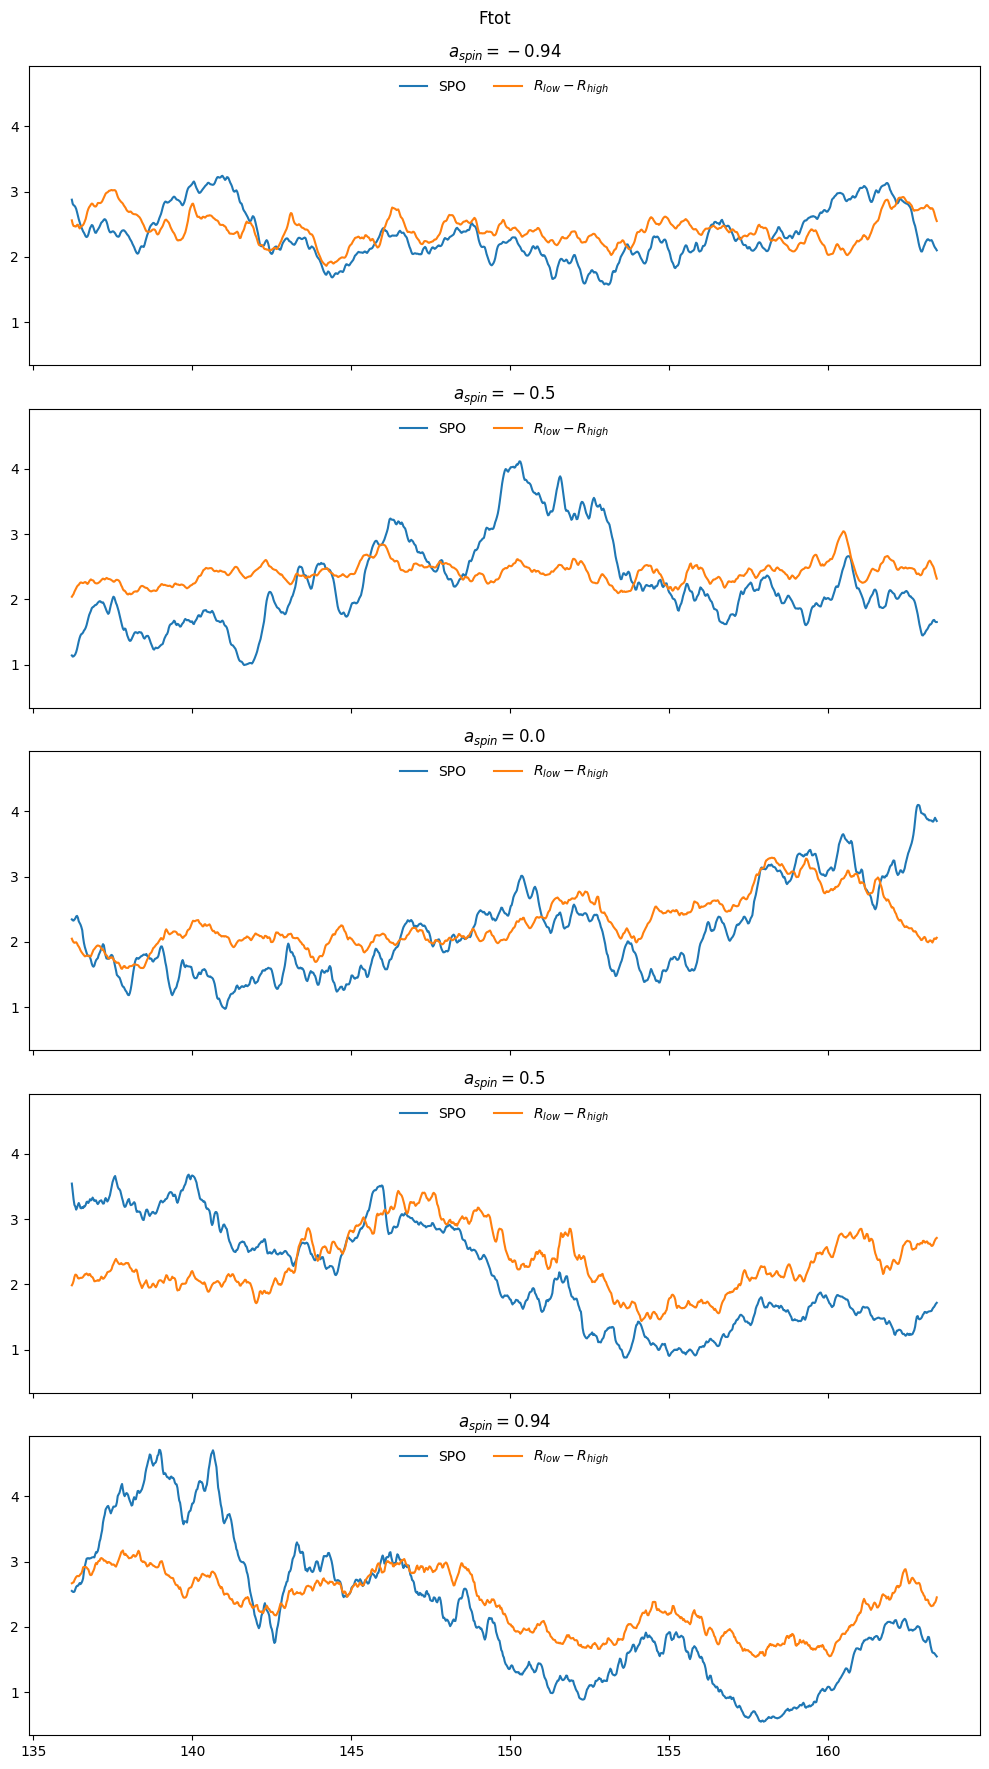

In [ ]:
# Plot Light Curve
def plot_lc(y='Ftot'):
    fig, axes = plt.subplots(5, figsize=(10,18), sharex=True, sharey=True)

    for c, a in enumerate(aspin):
        if True:
            for i in [30]:
                sel = pf1(aspin=a)(inc=i)
                df = pd.read_csv(sel.path.iloc[0], sep='\t')
                axes[c].plot(df.time_hr, df[y],label=mode['SPO'])
                axes[c].set_title(f'$a_{{spin}} = {a}$')
                axes[c].legend(frameon=False, loc='upper center', ncol=3)
                
                sel = pf2(aspin=a)(inc=i)
                df = pd.read_csv(sel.path.iloc[0], sep='\t')
                axes[c].plot(df.time_hr, df[y],label=mode['RhRl'])
                axes[c].set_title(f'$a_{{spin}} = {a}$')
                axes[c].legend(frameon=False, loc='upper center', ncol=3)
   
    fig.suptitle(f"{y}\n")
    fig.tight_layout()

plot_lc('Ftot')

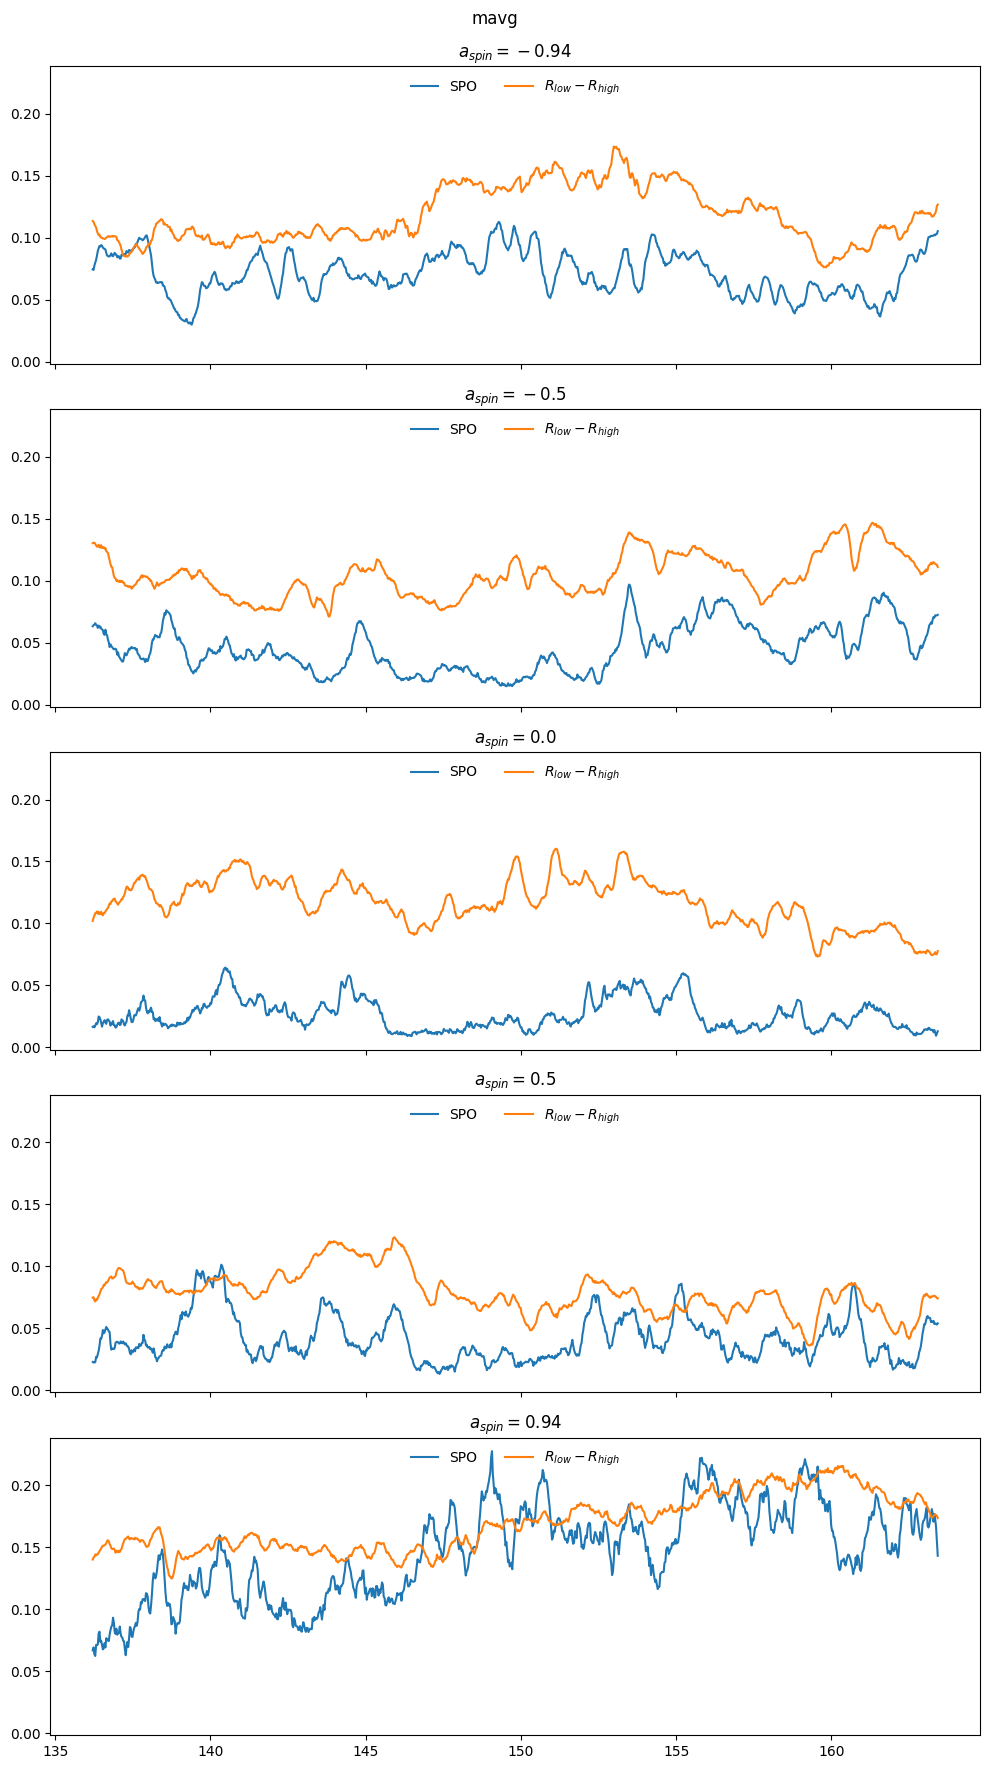

In [16]:
plot_lc('mavg')

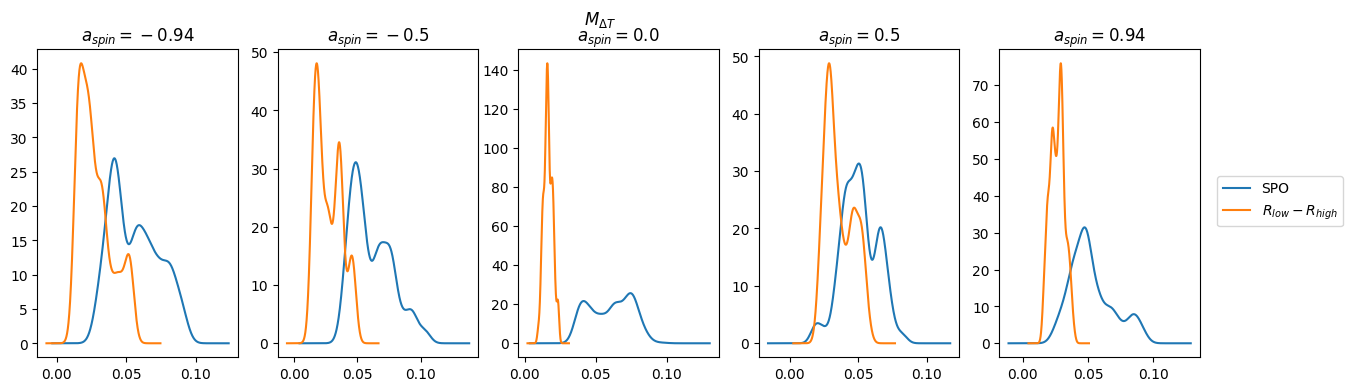

In [117]:
def get_M3(df, t_sep=106):
    N = len(df)
    var = 'minor_FWHM'
    M3_list = []
    for i in range(N - t_sep):
        M3_list.append(np.std(df[var][i:i+106]) / np.mean(df[var][i:i+106]))

    return M3_list

def compare_hist(ax, df_SPO, df_beta, func):
    (data_SPO) = pd.Series(func(df_SPO))
    data_beta = pd.Series(func(df_beta))

    # Combine data to let hist calculate bins over the full range
    all_data = pd.concat([data_SPO, data_beta])
    _, bins = np.histogram(all_data, bins=10) # Calculate bins once

    #ax.hist(data_SPO, bins=bins, label='SPO', alpha=0.7)
    #ax.hist(data_beta, bins=bins, label=r'$R_{low}-R_{high}$', alpha=0.7)

    data_SPO.plot.kde(ax=ax, label='SPO')
    data_beta.plot.kde(ax=ax, label=r'$R_{low}-R_{high}$')

    #ax.set_xscale('log')
    ax.set_ylabel('')

def vizrow(func, figsize=(15, 4), suptitle=None):
    fig, ax = plt.subplots(1, 5, figsize=figsize)
    for a, spin in enumerate(aspin):
        df1, df2 = read_pf(pf1(aspin=spin).path.iloc[0], pf2(aspin=spin).path.iloc[0])
        compare_hist(ax[a], df1, df2, func)
        ax[a].set_title(rf"$a_{{spin}}={spin}$")
    if suptitle is not None:
        plt.suptitle(suptitle)
    handles, labels = ax[-1].get_legend_handles_labels()
    fig.legend(handles, labels,
           loc='center right',  # Location relative to bbox_to_anchor
           bbox_to_anchor=(1, 0.5)), # (x, y) coordinates in figure coordinates

vizrow(get_M3, suptitle=r'$M_{\Delta T}$')